In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv("SocialNetwork.csv", sep = ';')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,-1].values

In [18]:
print(x)

[[      38  4077105]
 [      25 13584847]
 [      34 16460856]
 [      26 11983893]
 [      44  5220921]
 [      37 10079409]
 [      49 13558837]
 [      60 10134562]
 [      43 19751421]
 [      30 16275203]
 [      43 18396513]
 [      42  7793975]
 [      33 11887903]
 [      37  7685216]
 [      24 11275445]
 [      58 11816145]
 [      60 17375853]
 [      30 16401657]
 [      54 15146585]
 [      35 10359183]
 [      30  7641643]
 [      49 19559643]
 [      44  6050413]
 [      37  4580963]
 [      60  6679214]
 [      55  8128503]
 [      34  8368105]
 [      40 17165337]
 [      23  5131636]
 [      34 15910648]]


In [9]:
print(y)

[1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [20]:
print(x_train)

[[      30 16401657]
 [      44  6050413]
 [      37 10079409]
 [      60 17375853]
 [      43 19751421]
 [      24 11275445]
 [      37  4580963]
 [      30  7641643]
 [      25 13584847]
 [      34 15910648]
 [      49 13558837]
 [      44  5220921]
 [      54 15146585]
 [      35 10359183]
 [      30 16275203]
 [      60 10134562]
 [      55  8128503]
 [      26 11983893]
 [      38  4077105]
 [      49 19559643]
 [      58 11816145]
 [      33 11887903]]


In [21]:
print(x_test)

[[      34 16460856]
 [      23  5131636]
 [      37  7685216]
 [      43 18396513]
 [      34  8368105]
 [      60  6679214]
 [      40 17165337]
 [      42  7793975]]


In [22]:
print(y_train)

[0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0]


In [23]:
print(y_test)

[1 0 1 0 1 0 1 1]


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
print(x_train)

[[-0.93903142  0.99762389]
 [ 0.29169912 -1.2734286 ]
 [-0.32366615 -0.38947095]
 [ 1.69824831  1.21136151]
 [ 0.2037898   1.73255873]
 [-1.46648737 -0.12706185]
 [-0.32366615 -1.59582445]
 [-0.93903142 -0.92431435]
 [-1.37857804  0.37961862]
 [-0.58739412  0.88989701]
 [ 0.73124574  0.37391205]
 [ 0.29169912 -1.45541831]
 [ 1.17079237  0.72226236]
 [-0.4994848  -0.32808881]
 [-0.93903142  0.96988001]
 [ 1.69824831 -0.37737043]
 [ 1.25870169 -0.81749775]
 [-1.29066872  0.02837092]
 [-0.23575682 -1.70637039]
 [ 0.73124574  1.69048283]
 [ 1.52242966 -0.00843282]
 [-0.67530345  0.00731081]]


In [26]:
print(x_test)

[[-0.58739412  1.01061209]
 [-1.55439669 -1.47500735]
 [-0.32366615 -0.91475448]
 [ 0.2037898   1.43529328]
 [-0.58739412 -0.76492932]
 [ 1.69824831 -1.1354703 ]
 [-0.05993818  1.16517451]
 [ 0.11588047 -0.89089286]]


In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 2]
 [1 4]]


<ipython-input-30-b265fb6316ec>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


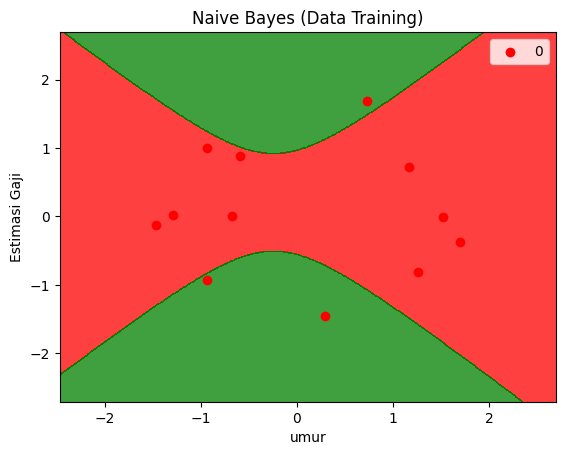

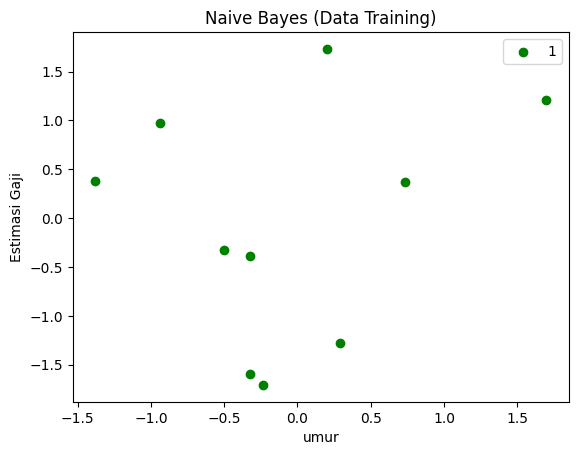

In [30]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train,y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Naive Bayes (Data Training)')
    plt.xlabel('umur')
    plt.ylabel('Estimasi Gaji')
    plt.legend()
    plt.show()

<ipython-input-31-d483afac4400>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


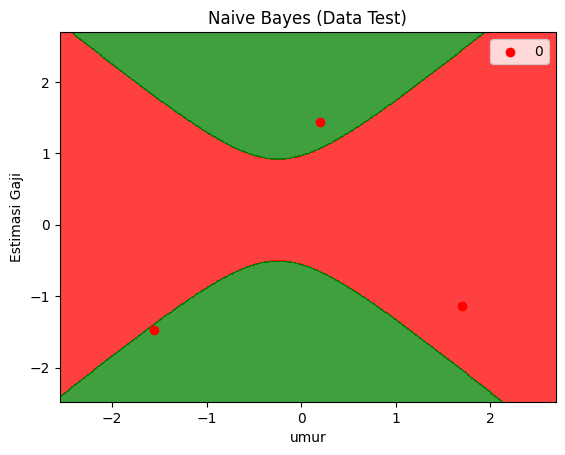

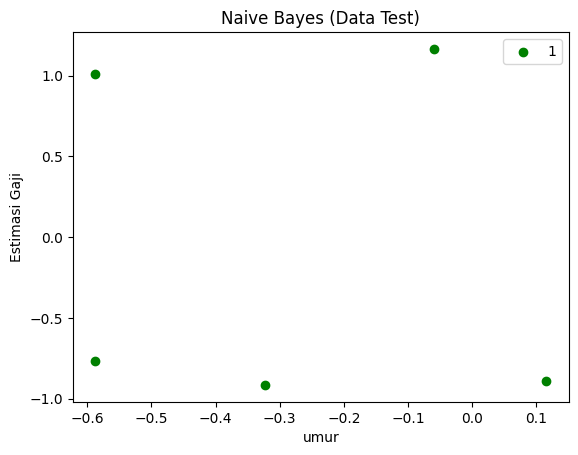

In [31]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test,y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:,1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Naive Bayes (Data Test)')
    plt.xlabel('umur')
    plt.ylabel('Estimasi Gaji')
    plt.legend()
    plt.show()